#추천 자료 https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=ko
#https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

##LSTM 캐글 실습

#import 구간

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#야후에서 크롤링한 데이터를 제공하는 라이브러리 구조 자체가 이런 식인듯함

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

#날짜, 시간 저장
from datetime import datetime

#코드에는 2번 하는데 한번 더 하는 과정이 필요한 것인가 아니면 가독성이나 설명을 위한 작업일까 의문
#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#주식 데이터 초기화?
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#주식 데이터 불러온 기간
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#tech_list에 주식 시간 별 주식 데이터 입력
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
    
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

#튜플화
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)  #concat 동일한 dataframe을 합치는 작업 axis = 숫자로 형태 정함
df.tail(10) #밑에서부터 10개

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000,AMAZON
2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400,AMAZON
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500,AMAZON
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800,AMAZON
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800,AMAZON
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100,AMAZON
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600,AMAZON
2024-01-10,152.059998,154.419998,151.880005,153.729996,153.729996,44421800,AMAZON
2024-01-11,155.039993,157.169998,153.119995,155.179993,155.179993,48958800,AMAZON


In [3]:
#요약 통계량
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,174.049682,175.639164,172.796773,174.361355,173.958064,5.835837e+07
std,15.796921,15.507280,15.713277,15.518937,15.694075,1.745690e+07
min,132.029999,134.919998,131.660004,134.759995,134.010925,1.612543e+07
25%,164.815002,166.044998,163.855003,165.220001,164.552498,4.759765e+07
50%,176.509995,178.210007,175.190002,176.649994,176.417572,5.476440e+07
75%,186.989998,188.250000,185.209999,187.220001,186.952614,6.501915e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [4]:
# AAPL 정보 출력
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-01-13 to 2024-01-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


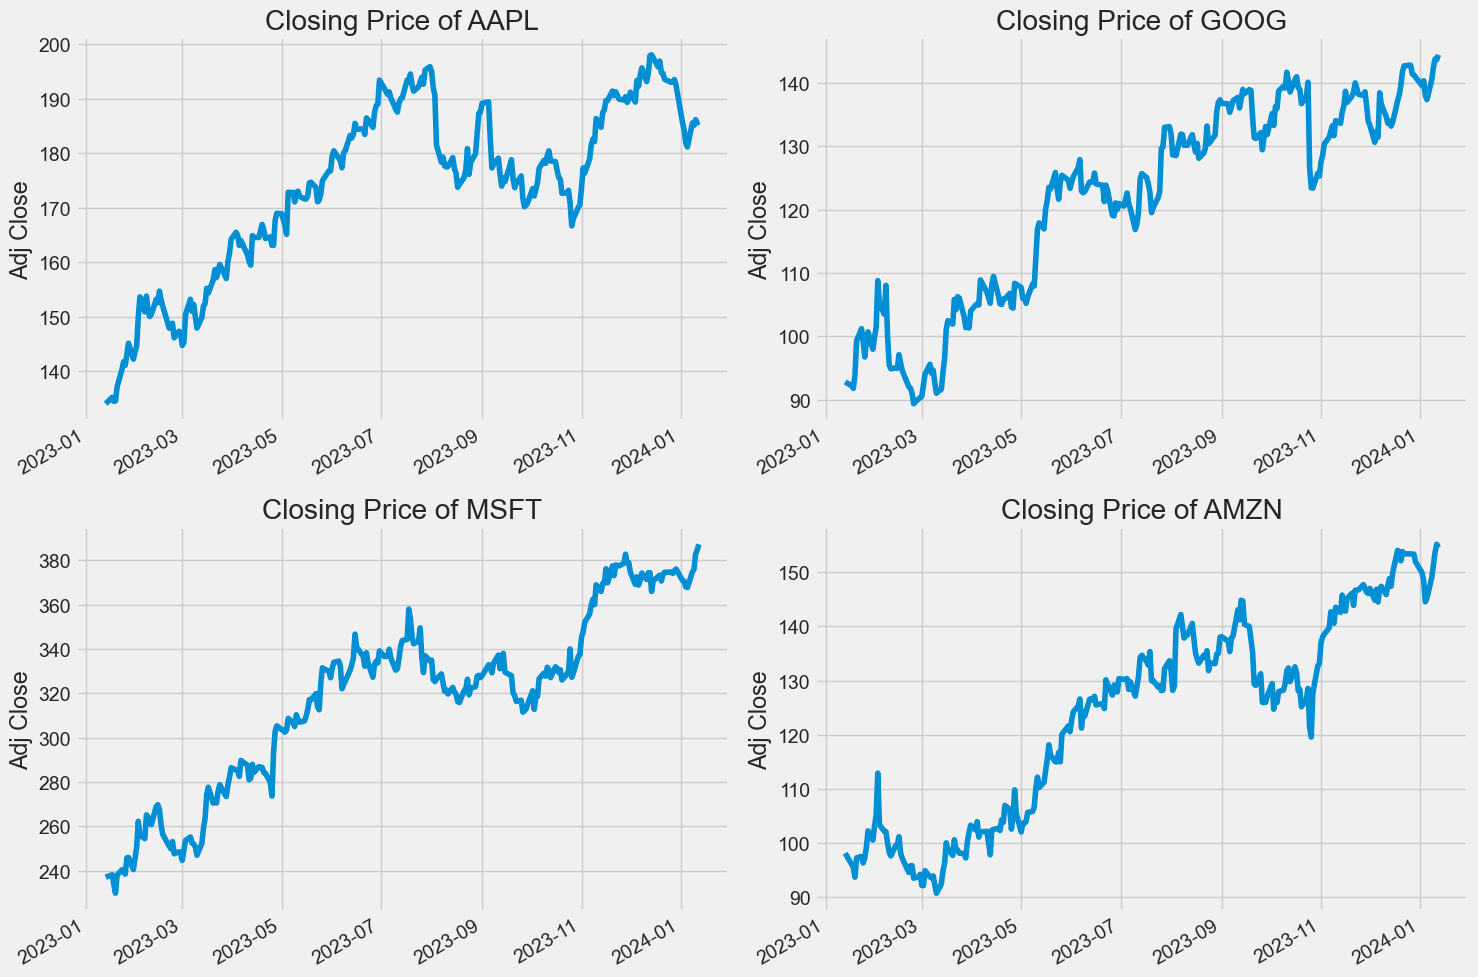

In [5]:
plt.figure(figsize=(15, 10)) #전체 화면 사이즈 조절
plt.subplots_adjust(top=1.25, bottom=1.2) #그래프끼리의 즉 서프플롯 간의 간격 조절

#인덱스와 값을 쌍으로 반환
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)  # 2X2 형렬 subplot 생성하고 i값은 위치
    company['Adj Close'].plot()  #info를 통해 찾은 company[Adj Close]를 기준으로 plot
    plt.ylabel('Adj Close') #y축 설정
    plt.xlabel(None) #x축 설정
    plt.title(f"Closing Price of {tech_list[i - 1]}") # 위에서 인덱스를 1부터 시작했기 때문에 tech_list 1번째를 불러오기 위해서 -1
    
plt.tight_layout() #겹치지 않음

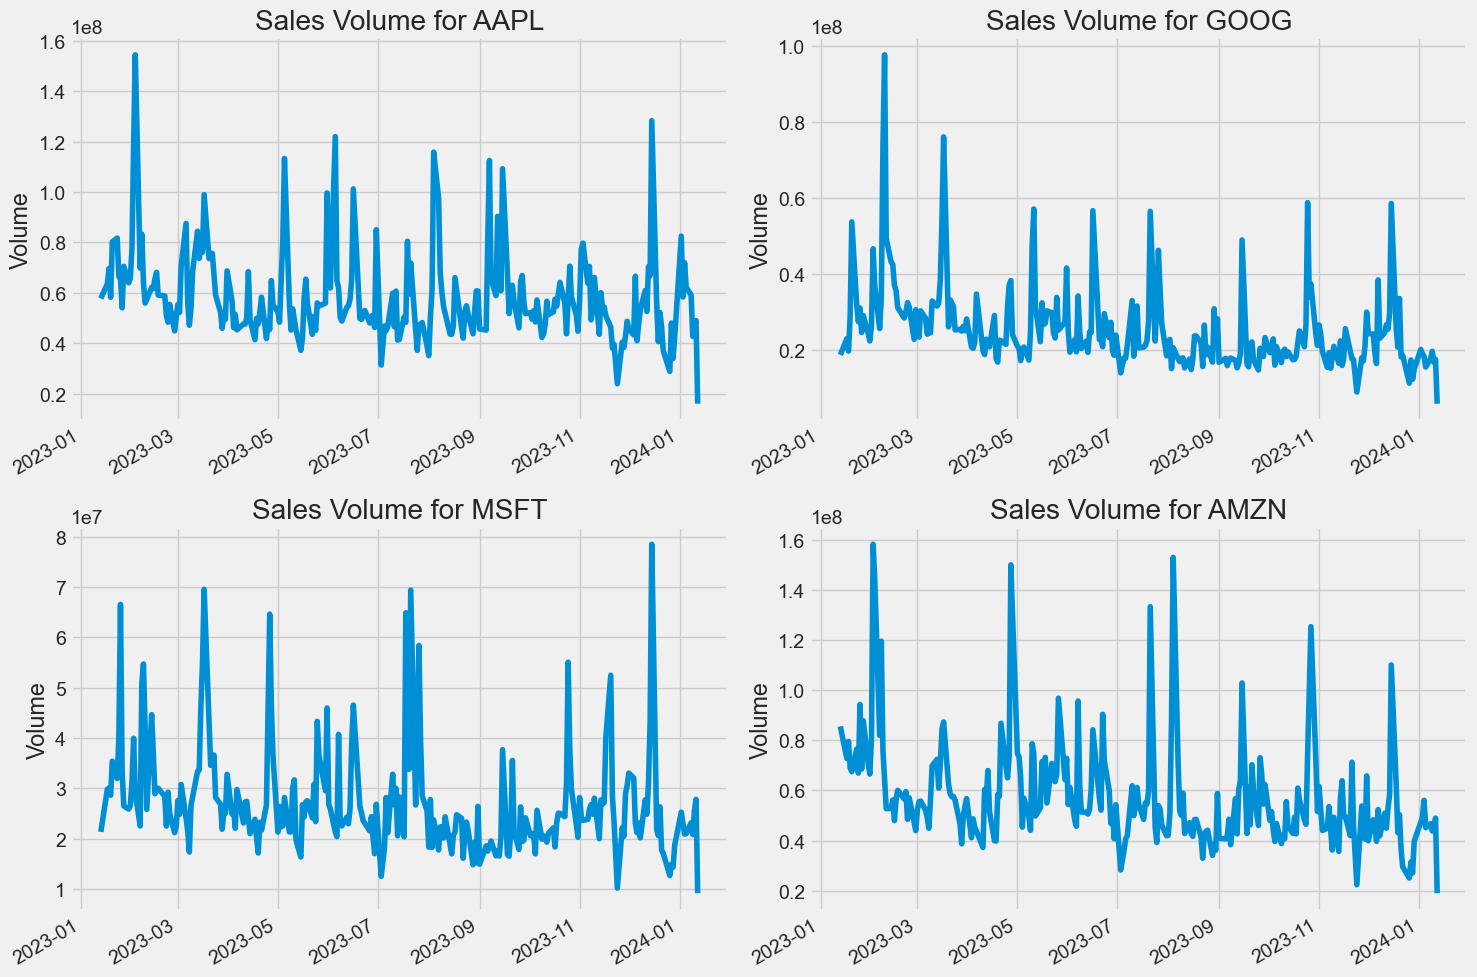

In [6]:
#거래량 그래프
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

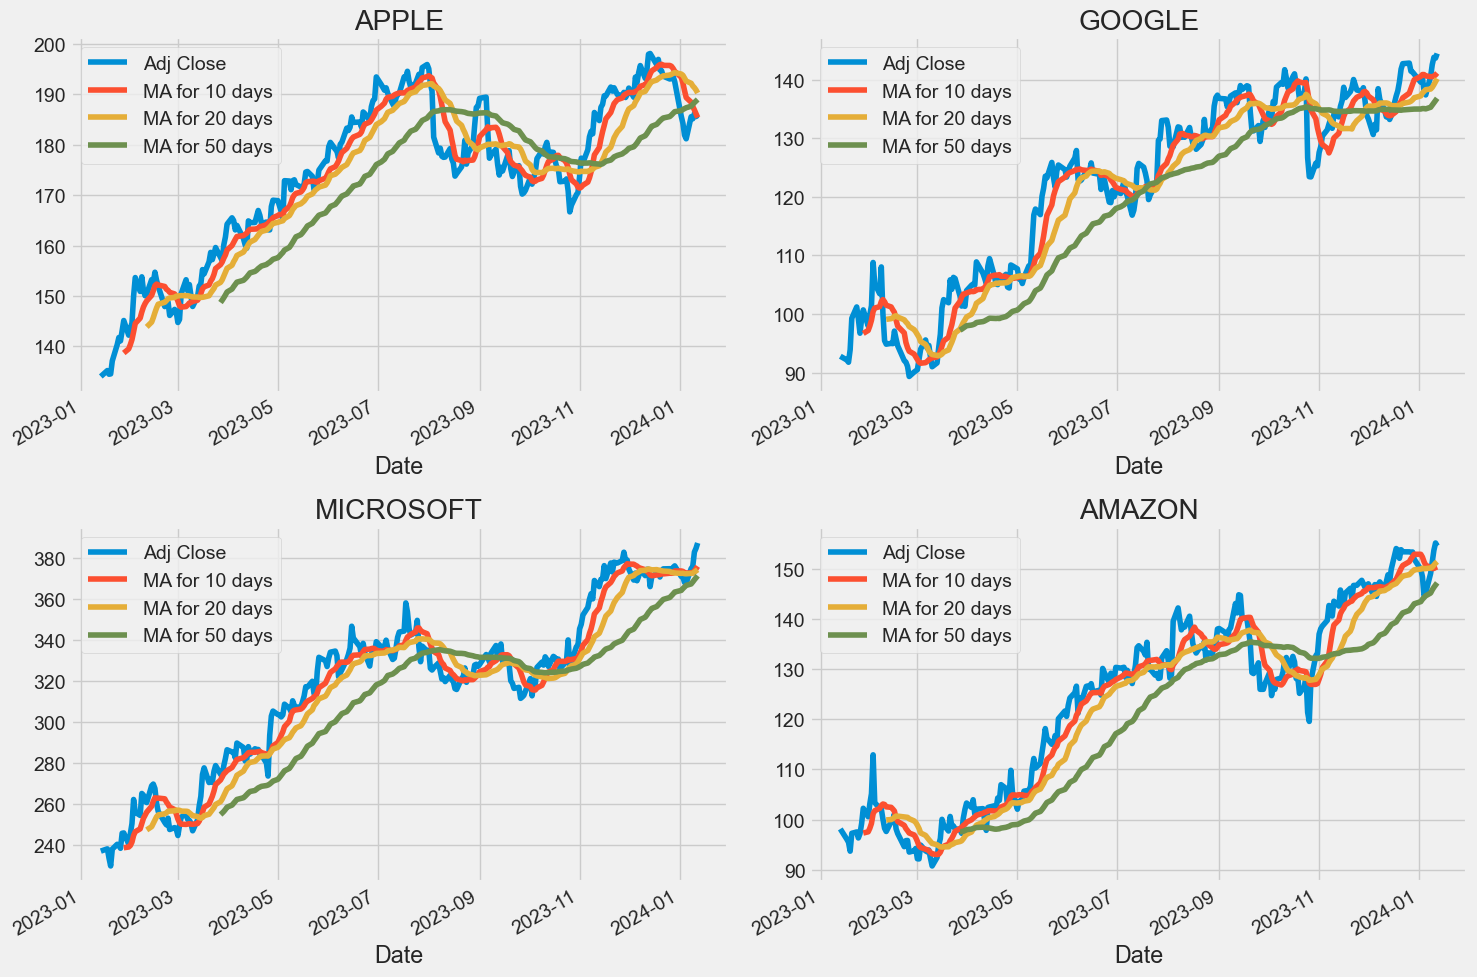

In [7]:
#이동평균선 10일, 20일, 50일 각 x일 동안 주식 종가의 평균
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()  #rolling이 pandas에 있는 이동평균선 자동 계산 함수

#fig > 액자, axes > 실제 데이터가 입력되는 곳
fig, axes = plt.subplots(nrows=2, ncols=2)
#크기 변경
fig.set_figheight(10)
fig.set_figwidth(15)

#종가, 10일, 20일, 50일을 불러와서 axes 위치에 타이틀대로 그림을 그리겠다
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

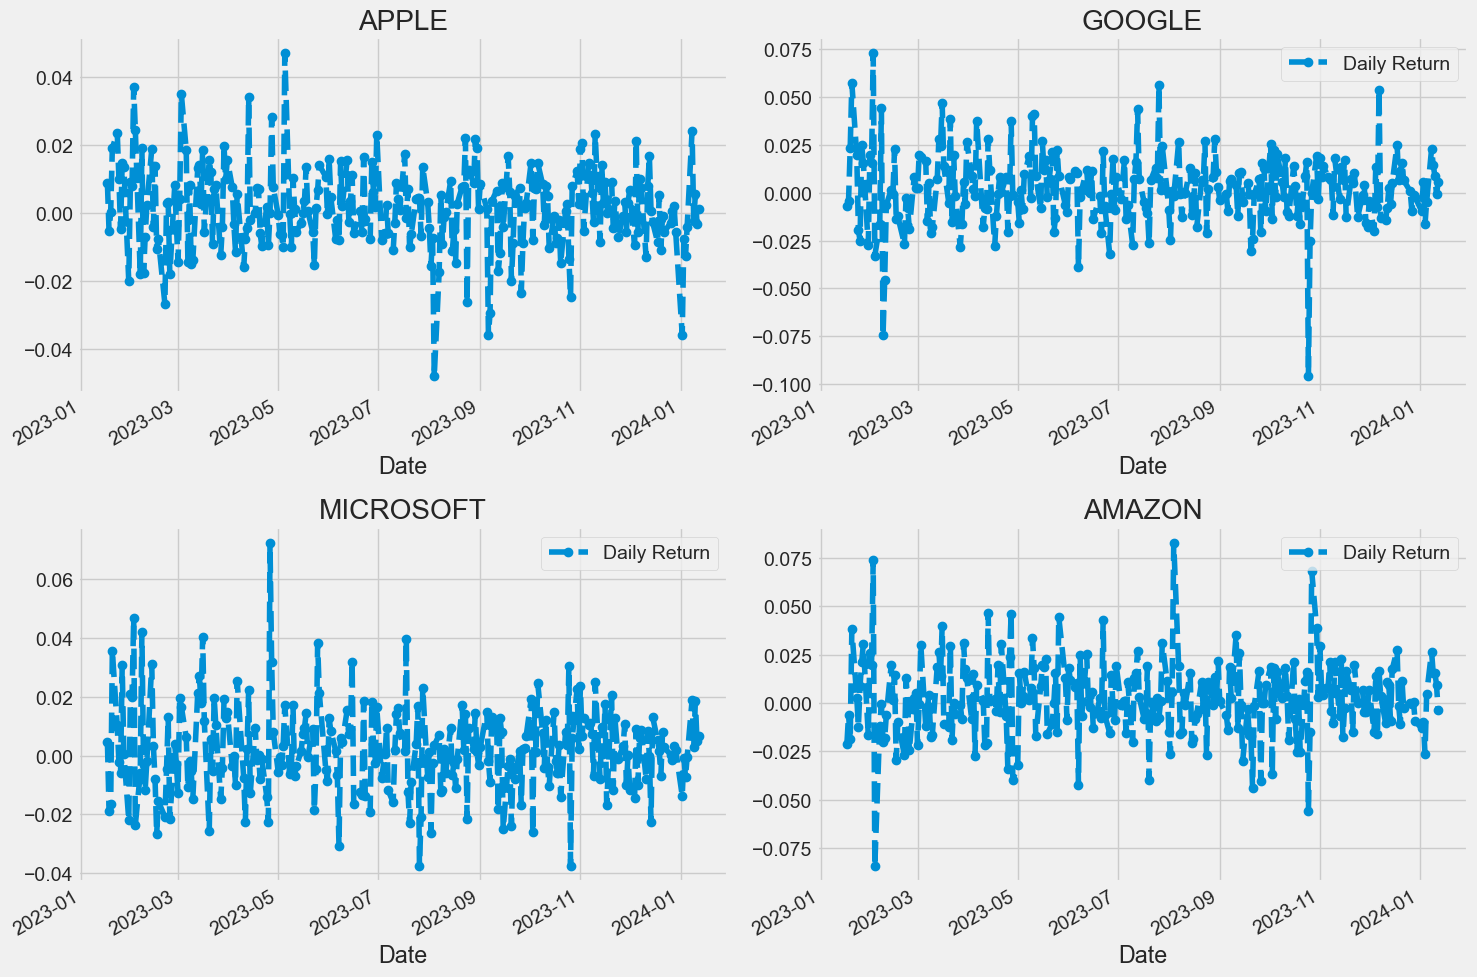

In [8]:
#for을 통해 pct_change(다음행 - 현재행)/(현재행) > 종가에 pct_change하면 수익률을 알 수 있음
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2) #2X2로 만들겠다
fig.set_figheight(10)
fig.set_figwidth(15)

#legend > 범례, linestyle > 표시선, marker > 데이터 포인트 형태 지정
AAPL['Daily Return'].plot(ax=axes[0,0], legend=False, linestyle='--', marker='o') #이 코드를 통해 오른쪽 상대에 표기된게 범례
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Date
2023-01-13         NaN
2023-01-17    0.008756
2023-01-18   -0.005370
2023-01-19    0.000444
2023-01-20    0.019221
                ...   
2024-01-08    0.024175
2024-01-09   -0.002263
2024-01-10    0.005671
2024-01-11   -0.003223
2024-01-12    0.001347
Name: Daily Return, Length: 251, dtype: float64

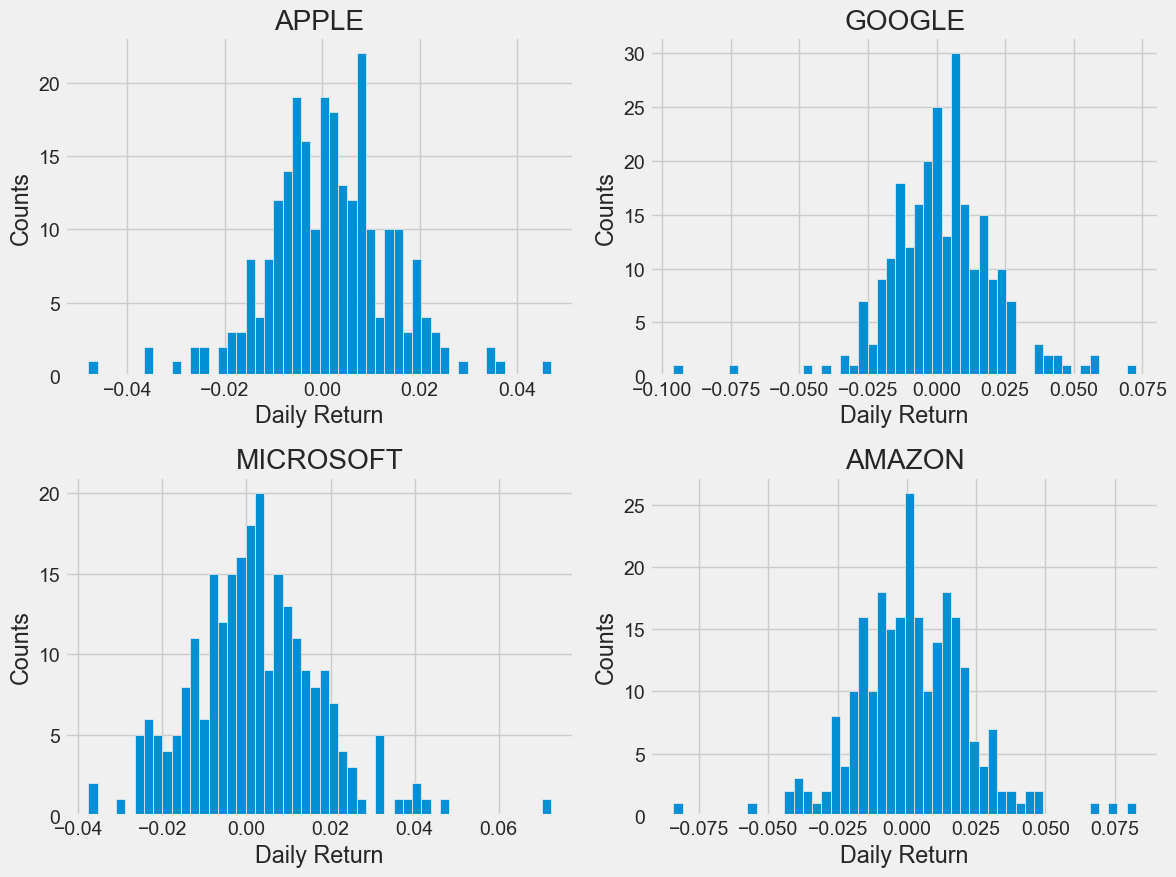

In [9]:
plt.figure(figsize=(12, 9))

#인덱스와 원소를 같이 for문 돌리는 형태 index를 1부터 설정해줌
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i) # 2x2형태를 한 후 ㄹ 형태 순서로1,2,3,4 인덱스 번호 맞춰서 그려줌
    company['Daily Return'].hist(bins=50) #히스토그램으로 만들어라 bins 기본 값은 10이고 구간 수 설정, x축 칸의 수라고 생각하면 될듯
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

#출력값을 통해 50개로 세분화한 값들 중 하루 수익률을 모아서 그래프화 한 것 즉 대형주들은 변동성이 크지 않다 7% 오르는 날도 거의 없다
AAPL['Daily Return']

In [10]:
#yahoo에서 tech_list 항목 주식 데이터 종가 가져오기
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

#종가에 대한 수익률
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-13,NaN,NaN,NaN,NaN
2023-01-17,0.008756,-0.021097,-0.006897,0.004682
2023-01-18,-0.005370,-0.006143,-0.004123,-0.018889
2023-01-19,0.000444,-0.018647,0.023208,-0.016454
2023-01-20,0.019221,0.038108,0.057182,0.035744


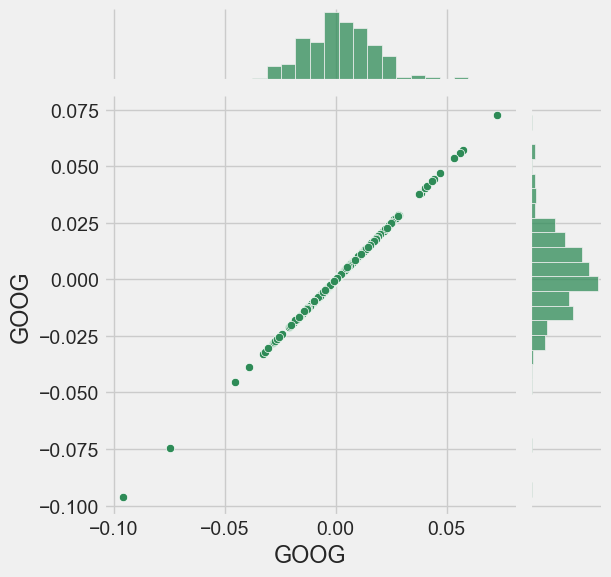

In [11]:
#jointplot 함수의 역할이 산점도(scatter)와 분포(histogram)를 동시에 그려줌 kind='scatter' 강조의 의미로 사용했다고 함
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

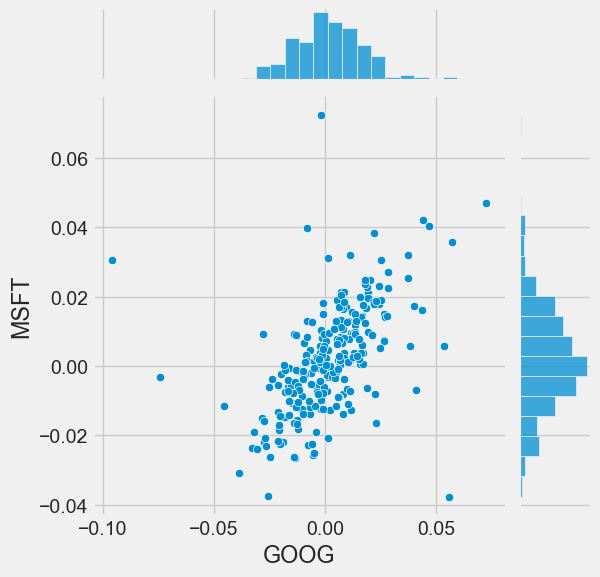

In [12]:
# 주식 데이터 간의 상관관계를 파악함
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

C:\Users\ether\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


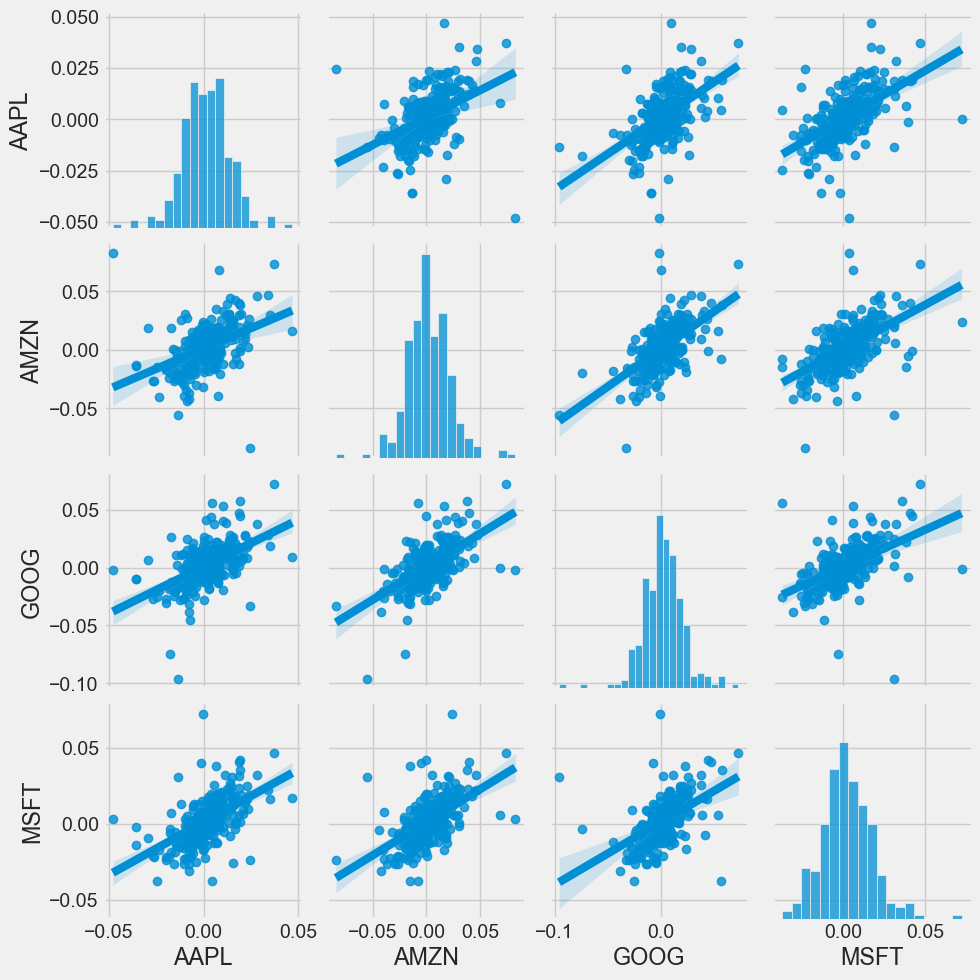

In [13]:
# kind에 사용 가능함 scatter > 기본값, 산점도 / reg > 회귀선이 추가 됨
sns.pairplot(tech_rets, kind='reg')

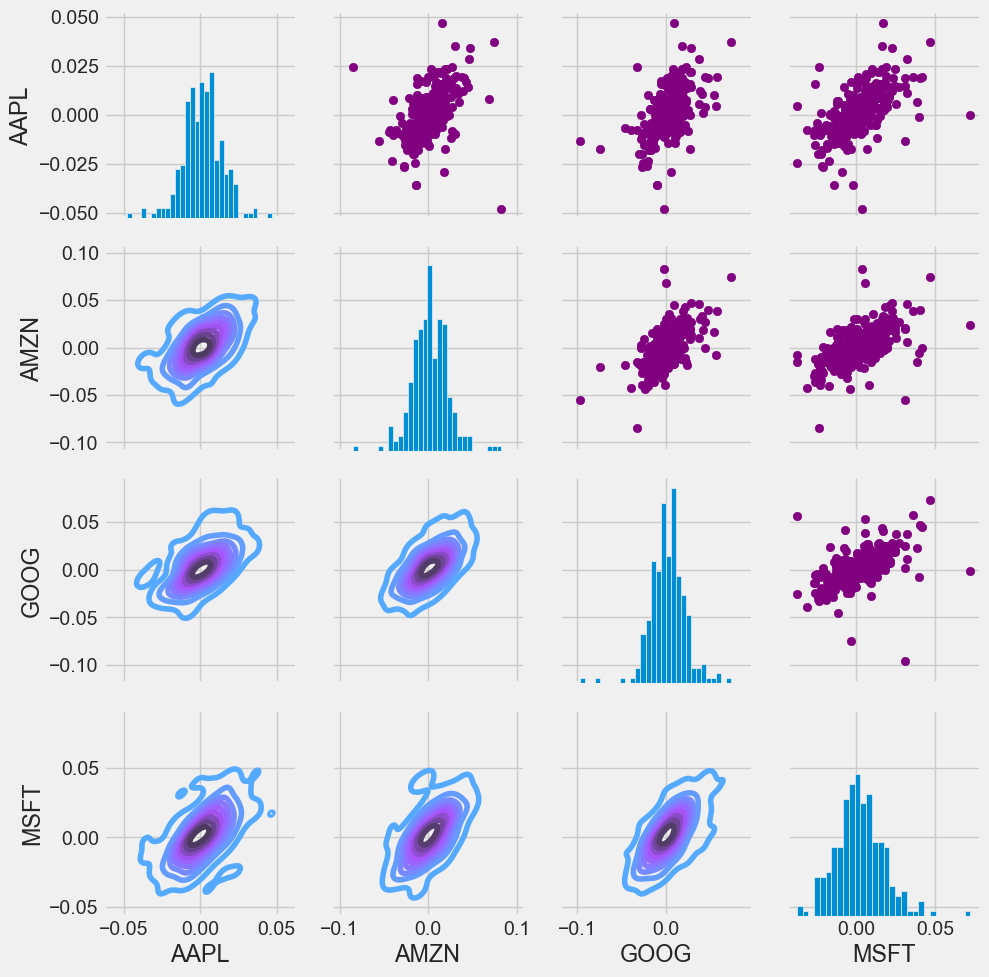

In [14]:
#PairGrid > 대각선을 기준으로 위, 아래 각각 시각화 도구 설정 가능 / dropna > 데이터에서 누락된 값 
return_fig = sns.PairGrid(tech_rets.dropna())

#상단 부분은 scatter
return_fig.map_upper(plt.scatter, color='purple')

#하단 부분은 kdeplot, cmap > 색상 맵
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#대각선
return_fig.map_diag(plt.hist, bins=30)

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-13,134.010925,98.120003,92.800003,237.127411
2023-01-17,135.184387,96.050003,92.160004,238.237579
2023-01-18,134.458450,95.459999,91.779999,233.737457
2023-01-19,134.518112,93.680000,93.910004,229.891571
2023-01-20,137.103668,97.250000,99.279999,238.108719


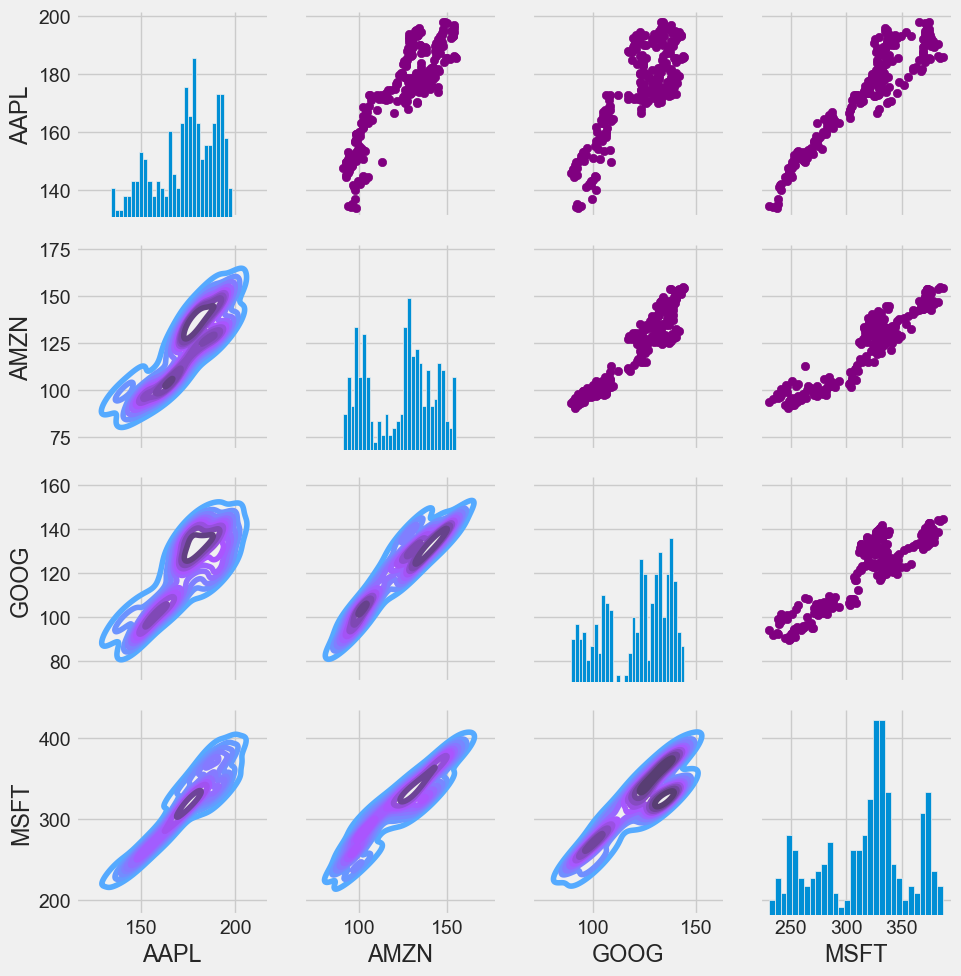

In [15]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

closing_df.head()

Text(0.5, 1.0, 'Correlation of stock closing price')

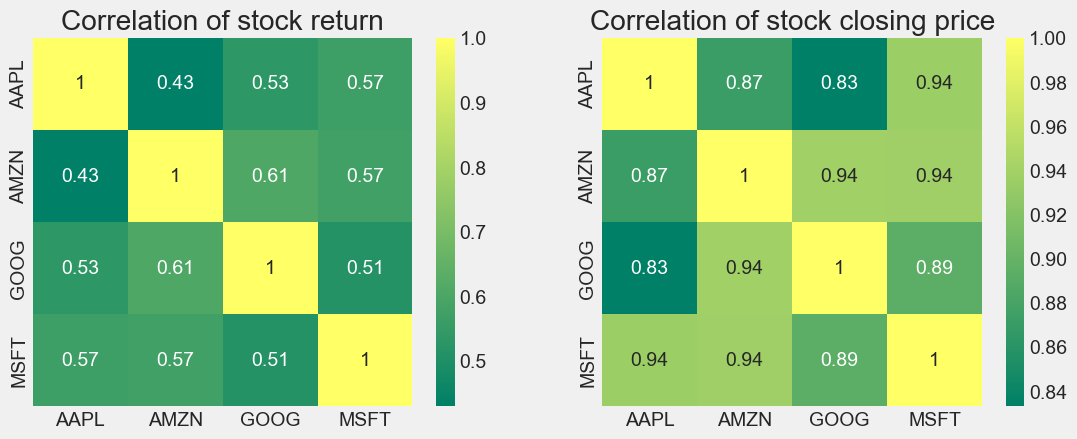

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
#종가 수익률 / 히트맵을 corr() 상관계수를 구하는 함수를 통해 annot 셀에 값을 보여주는가 / 상관계수는 -1 ~ 1 사이 값이 나온다
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
#종가
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Index(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype='object')
AAPL    0.001388
AMZN    0.002025
GOOG    0.001954
MSFT    0.002079
dtype: float64
AAPL    0.012600
AMZN    0.020333
GOOG    0.019152
MSFT    0.015375
dtype: float64


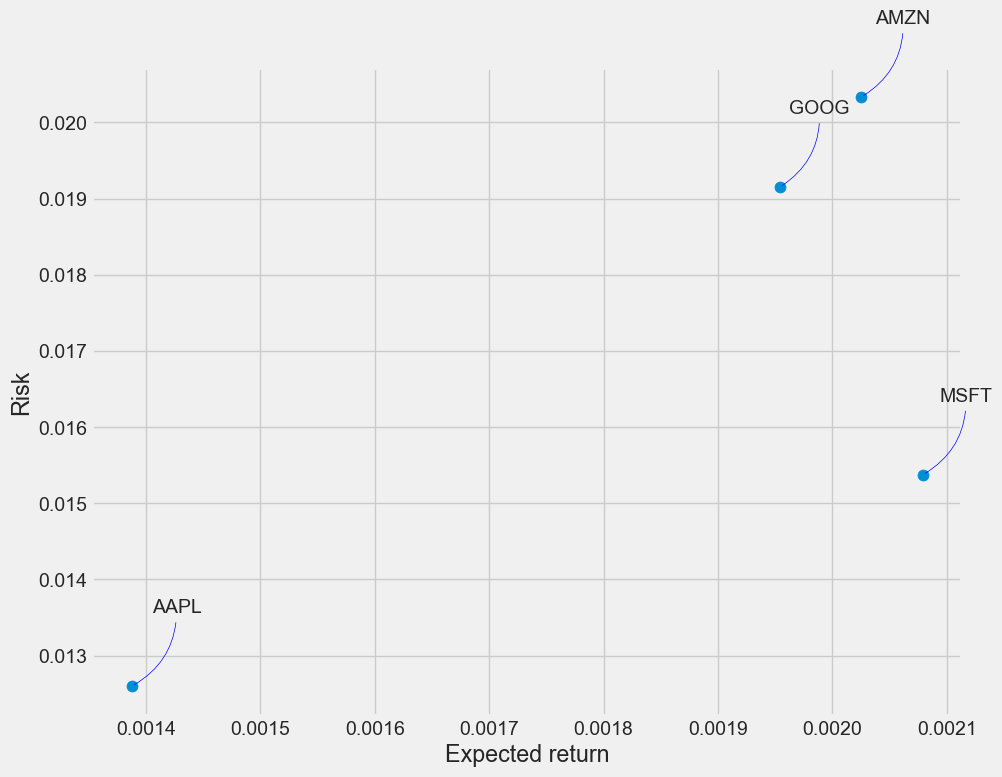

In [17]:
#종가 수익률에 대해서 결측값 제거
rets = tech_rets.dropna()

#반지릉이 20인 원주율 구하는 np
area = np.pi * 20

plt.figure(figsize=(10, 8))
#산점도 > rests의 평균 (x축 값), 표준편차 (y축 값), s > 산점도의 크기
#아래 3줄 코드로 표와 산점도 위치까지 끝남
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# zip을 사용하여 튜플로 묶어줌 즉 데이터가 colums 평균 표준편차 순서로 행렬화 됨 > label에 맞춰 rets.mean() > x 좌표, rets.std() > y 좌표
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    # plt에 있는 annotate 주석 처리 기능 > label 순서 / xy 좌표 / 주석 시작점에서 50,50 떨어진 위치 / 텍스트 위치 지정 / ha, va 가로 세로
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
    
print(rets.columns)
print(rets.mean())
print(rets.std())

In [18]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449694,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655555,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787855,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500
2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900


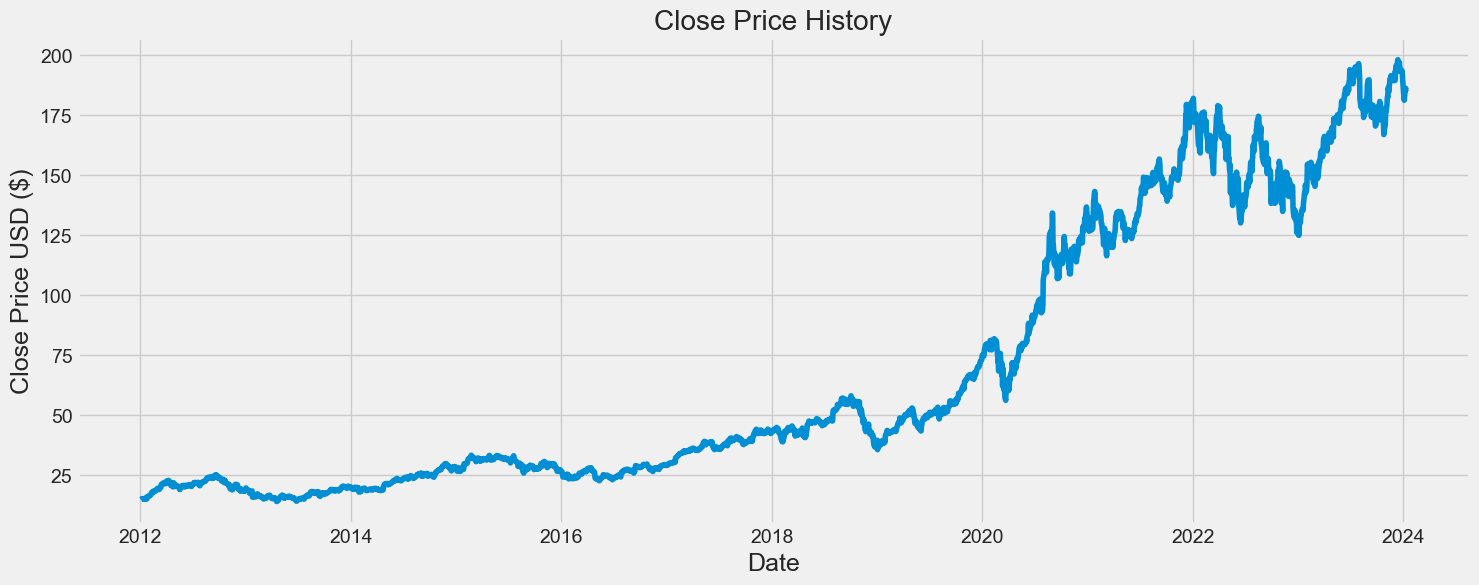

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
#close가 종가 (단기 매매 위주로 기술적 지표가 중요시) / Adj Close 여러 변수를 포함한 종가 (장기투자 과거부터 현재까지 데이터 중요시)
#plot 선 그래프
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Close 데이터만 보여라
data = df.filter(['Close'])

# 행 데이터
dataset = data.values

# dataset 95%만 (사용한다는데 왜 이게 성능을 올려주는걸까) 올림하여 정수화
# 모든 데이터를 넣지 않고 갯수 통제, 전체의 95%만 훈련하겠다
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2876

In [21]:
# 사용하는 구조 클래스 생성 >> MinMaxScaler fitting > 데이터 변환 > 데이터 역변환
# 데이터를 주어진 범위로 스케일링
from sklearn.preprocessing import MinMaxScaler

# feature_range=(최소 범위,최대 범위) 튜플  > 스케일링 범위를 설정
scaler = MinMaxScaler(feature_range=(0,1))
# fit_transform 데이터셋을 학습하고 지정된 범위로 스케일링
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.93527456],
       [0.93201654],
       [0.93331977]])

In [22]:
# 원본 데이터와 연습 데이터 분리를 위한 코드로 0부터 training_data_len 까지의 행 데이터, : 열에 있는 모든 데이터
# 스케일링된 dataset을 전체가 아닌 95%만 train_data에 넣겠는 빈 공간 생성
train_data = scaled_data[0:int(training_data_len), :]

# 학습 후 데이터를 넣기 위한 리스트
x_train = []
y_train = []

# 60은 알아서 정하는 것 같다 / 훈련데이터 생성 코드
for i in range(60, len(train_data)):
    # i부터 60일 전까지의 데이터를 0번째 열( close 데이터를 불러와라 )
    x_train.append(train_data[i-60:i, 0])
    # 현재 날짜 데이터
    y_train.append(train_data[i, 0])
    # 60일 간의 데이터 처리
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# numpy 배열로 변환
x_train, y_train = np.array(x_train), np.array(y_train)

# keras 사용을 위한 x_train을 (x,y) 형태로 reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 순차적인 구조를 가진 모델 생성
model = Sequential()

# 128개 뉴런, 시퀀스 반환, 
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# 64개 뉴런, 시퀀스 반환 비활성화
model.add(LSTM(64, return_sequences=False))
# Dense > fully connected layer 다른 레이어와 결합하여 딥러닝 모델을 구성할 때 사용
model.add(Dense(25))
# 최종 출력 레이어 1개
model.add(Dense(1))

# 모델 컴파일, 손실 함수 평균 제곱 오차
model.compile(optimizer='adam', loss='mean_squared_error')

# 만든 모델 훈련시키기, x, y 값을 batch_size > 반복마다 사용할 데이터 수, epochs > 전체 데이터 훈련 반복 수 로 진행
model.fit(x_train, y_train, batch_size=1, epochs=1)





2816/2816 [==============================] - 27s 9ms/step - loss: 0.0014


In [24]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

# 형태 재구성
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# 알아서 예측값 생성
predictions = model.predict(x_test)
# 다시 원래의 스케일로 되돌린다
predictions = scaler.inverse_transform(predictions)

# 평균 제곱 오차의 제곱근, 모델 성능 평가 / y_test > 실제 테스트 데이터의 정답값
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 9ms/step


4.10496002165172

C:\Users\ether\AppData\Local\Temp\ipykernel_30344\1532303627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


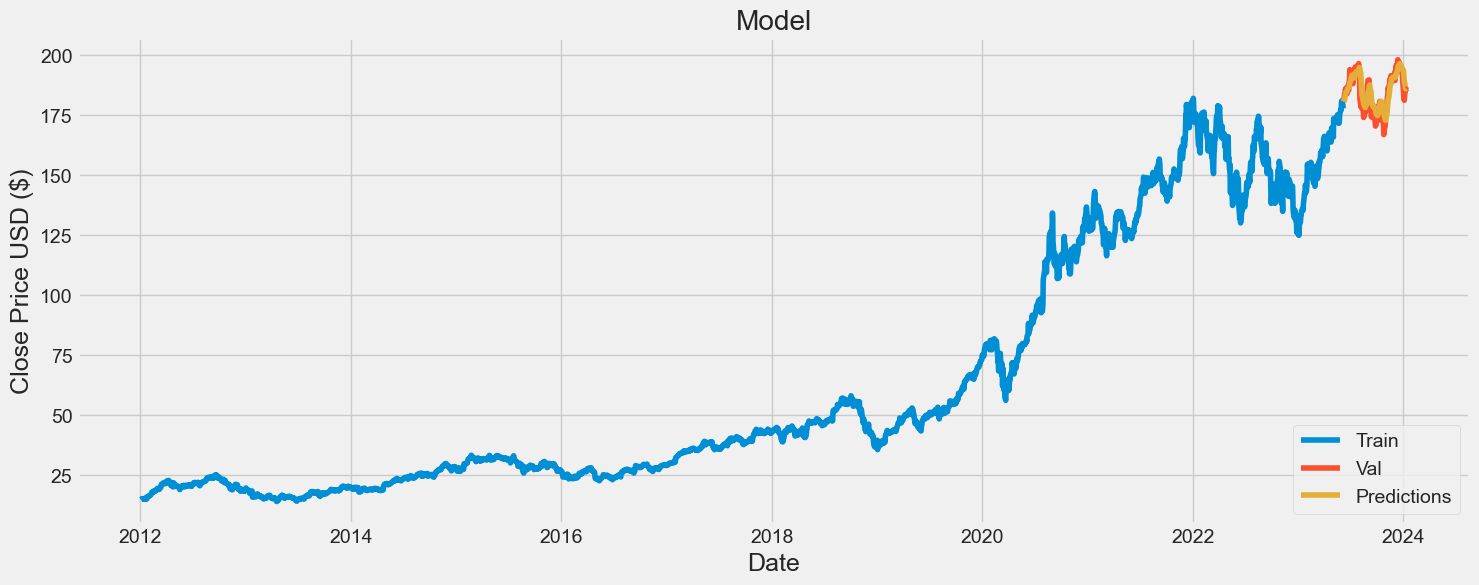

In [30]:
# 학습 데이터
train = data[:training_data_len]
# 검증 데이터
valid = data[training_data_len:]
# 열 부분에 예측값을 넣어줌
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# 그래프 추가
plt.plot(train['Close'])
# 검증 데이터 각 Close, Predictions 열 데이터를 통해 그래프 생성
plt.plot(valid[['Close', 'Predictions']])
# Val > 실제 Close 값 / Predictions > 예측 값
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
valid

,Close,Predictions
Date,,
2023-06-08,180.570007,180.663956
2023-06-09,180.960007,180.955002
2023-06-12,183.789993,181.311325
2023-06-13,183.309998,182.016830
2023-06-14,183.949997,182.716736
...,...,...
2024-01-08,185.559998,187.396240
2024-01-09,185.139999,186.460587
2024-01-10,186.190002,185.989990
